In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
import sys
import os
## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [3]:
drive.mount('/content/drive')

#Define la parte del directorio que quieres trabajar
path = "/content/drive/MyDrive/Mod2/Finanzas"

sys.path.append(path)##para importar archivo de funciones propias a traves de import

Mounted at /content/drive


In [4]:
# Ruta al archivo
ruta_nuevos = '/content/drive/MyDrive/Mod2/Finanzas/data/datos_nuevos_creditos.csv'

# Leer excel
df_nuevos_creditos = pd.read_csv(ruta_nuevos)
df_nuevos_creditos

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication
0,10001,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,37752.0
1,10002,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,52917.0
2,10003,732,0.532314,76570,26,5,8,17730,7,10,Rent,High School,Widowed,10,106380.0
3,10004,710,0.295541,86752,51,8,16,7166,16,18,Mortgage,Masters,Widowed,17,35830.0
4,10005,848,0.248378,102286,29,4,8,4688,16,1,Own,High School,Widowed,26,32816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,11054,603,0.257370,179888,37,0,17,19788,8,1,Mortgage,High School,Widowed,23,356184.0
1054,11055,710,0.690966,178287,48,6,8,13469,3,14,Rent,Bachelor,Widowed,14,282849.0
1055,11056,642,0.099068,195318,45,5,19,15991,0,6,Own,PhD,Single,22,319820.0
1056,11057,790,0.164651,109782,59,8,17,9726,7,17,Own,High School,Widowed,28,116712.0


In [5]:
df_nuevos_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1058 non-null   int64  
 1   CreditScore                      1058 non-null   int64  
 2   DebtRatio                        1058 non-null   float64
 3   Assets                           1058 non-null   int64  
 4   Age                              1058 non-null   int64  
 5   NumberOfDependents               1058 non-null   int64  
 6   NumberOfOpenCreditLinesAndLoans  1058 non-null   int64  
 7   MonthlyIncome                    1058 non-null   int64  
 8   NumberOfTimesPastDue             1058 non-null   int64  
 9   EmploymentLength                 1058 non-null   int64  
 10  HomeOwnership                    1058 non-null   object 
 11  Education                        1058 non-null   object 
 12  MaritalStatus       

In [6]:
# Ruta al archivo
ruta_historicos = '/content/drive/MyDrive/Mod2/Finanzas/data/datos_historicos.csv'

# Leer excel
df_historicos = pd.read_csv(ruta_historicos)
df_historicos

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc
0,1,384,0.016560,37950,20,0,2,17355,9,28,Mortgage,Bachelor,Divorced,18,0.196566
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568
3,4,363,0.463521,39543,54,9,0,19339,5,22,Own,High School,Widowed,3,0.181348
4,5,804,0.504824,38522,72,1,10,7928,18,19,Own,PhD,Married,5,0.343376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,448,0.602547,57758,22,9,19,17797,19,5,Rent,Bachelor,Widowed,2,0.190319
9996,9997,643,0.633910,67051,85,3,1,7034,4,0,Rent,High School,Married,1,0.168900
9997,9998,695,0.019713,65309,42,4,3,9105,18,4,Rent,Bachelor,Divorced,6,0.237987
9998,9999,387,0.174242,115144,20,3,10,19388,0,11,Mortgage,PhD,Divorced,5,0.180394


In [7]:
df_historicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   CreditScore                      10000 non-null  int64  
 2   DebtRatio                        10000 non-null  float64
 3   Assets                           10000 non-null  int64  
 4   Age                              10000 non-null  int64  
 5   NumberOfDependents               10000 non-null  int64  
 6   NumberOfOpenCreditLinesAndLoans  10000 non-null  int64  
 7   MonthlyIncome                    10000 non-null  int64  
 8   NumberOfTimesPastDue             10000 non-null  int64  
 9   EmploymentLength                 10000 non-null  int64  
 10  HomeOwnership                    10000 non-null  object 
 11  Education                        10000 non-null  object 
 12  MaritalStatus      

In [8]:
df_historicos.describe()

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,NoPaidPerc
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,577.648800,0.499706,109870.32650,53.21540,4.503500,9.452900,10446.551100,9.488900,14.598800,14.420900,0.226052
std,2886.89568,159.219702,0.287868,51950.50836,20.65087,2.862028,5.729211,5449.335633,5.766594,8.634077,8.710128,0.067179
min,1.00000,300.000000,0.000035,20008.00000,18.00000,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,438.000000,0.252349,64306.50000,35.75000,2.000000,4.000000,5719.000000,4.000000,7.000000,7.000000,0.198827
50%,5000.50000,581.000000,0.501707,110635.50000,53.00000,5.000000,9.000000,10427.000000,10.000000,15.000000,14.000000,0.233158
75%,7500.25000,717.000000,0.744447,153852.25000,71.00000,7.000000,14.000000,15123.250000,14.000000,22.000000,22.000000,0.267660
max,10000.00000,849.000000,0.999834,199984.00000,89.00000,9.000000,19.000000,19997.000000,19.000000,29.000000,29.000000,0.382792


# <font color='056938'> **1. Análisis univariado para variables categóricas** </font>
---

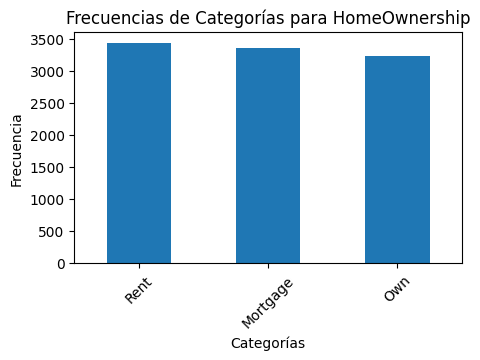

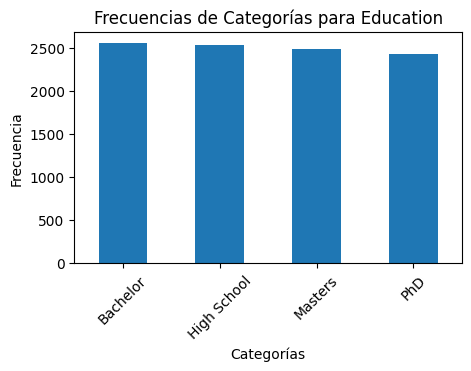

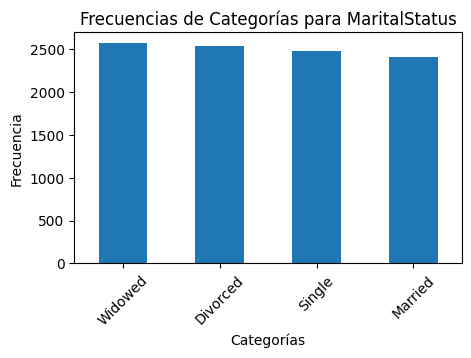

In [9]:
# Crear gráficos de barras para cada columna categórica de la base de datos calculo diferencial
for col in df_historicos.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(5, 3))
    df_historicos[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencias de Categorías para {col}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

Las variable categorias no presenta desbalance, esto implica que estas variables contribuyen a distinguir entre diferentes clases o patrones en el modelo, por lo tanto, se tendran en cuenta en el modelo.

# <font color='056938'> **2. Análisis univariado para variables númericas** </font>


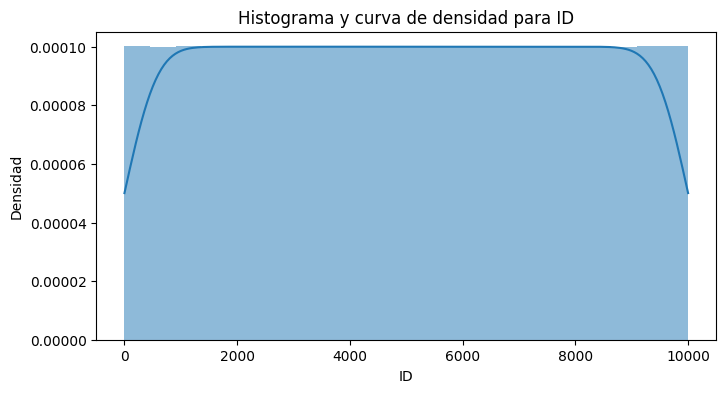

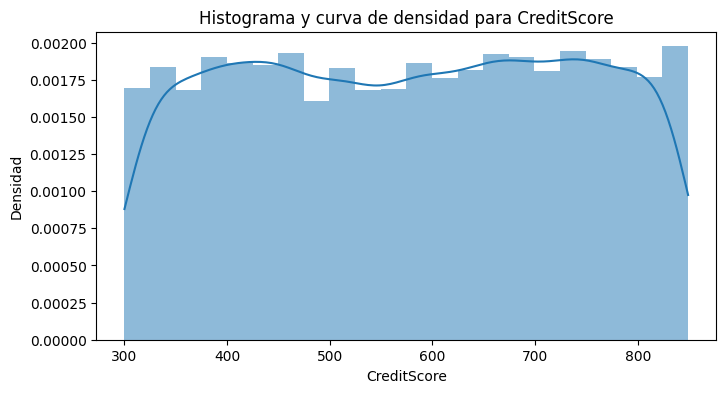

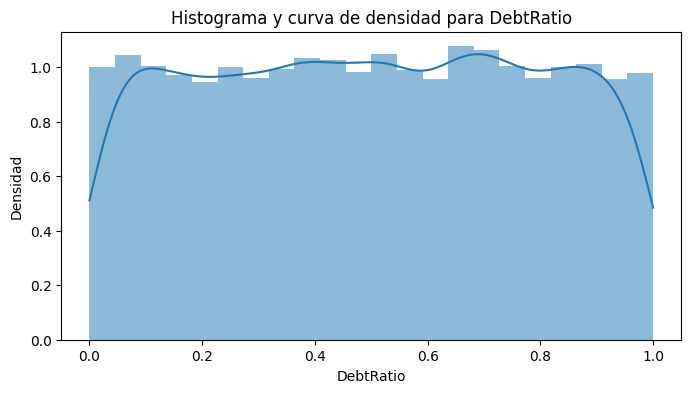

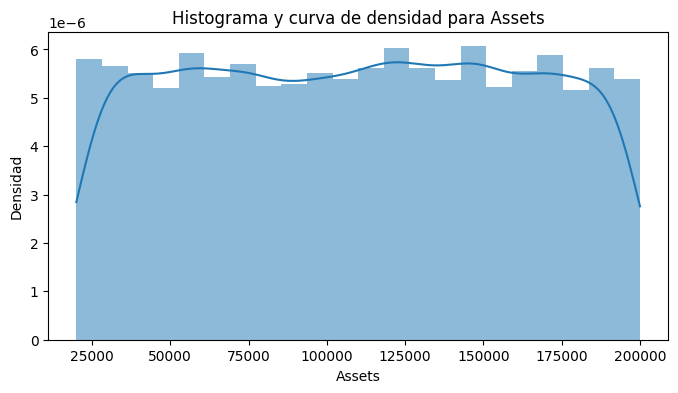

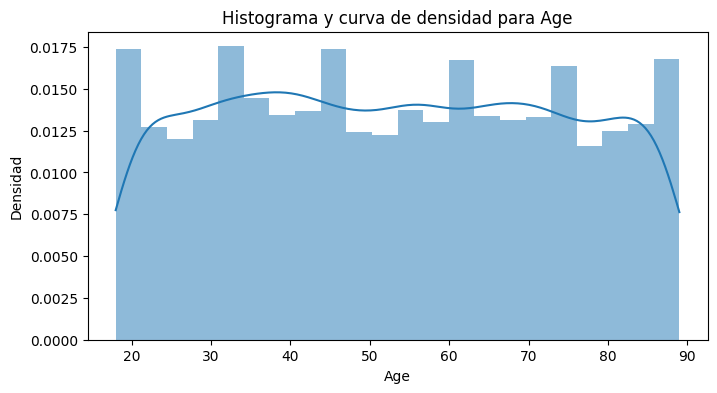

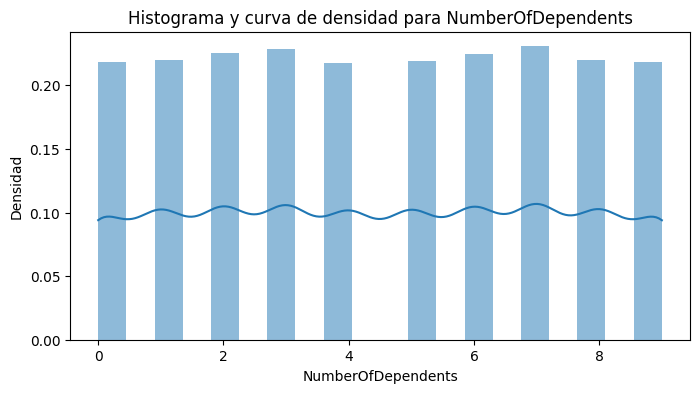

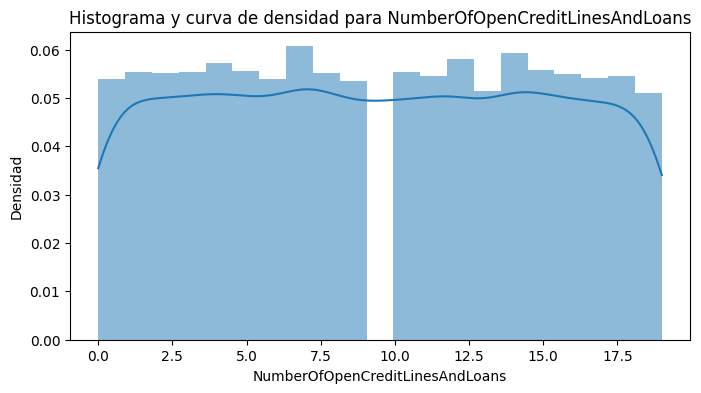

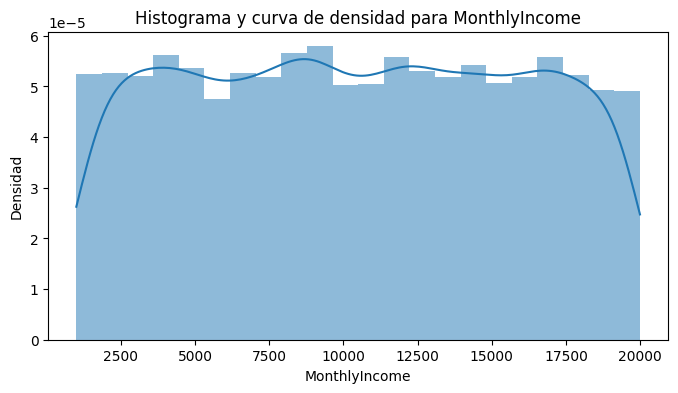

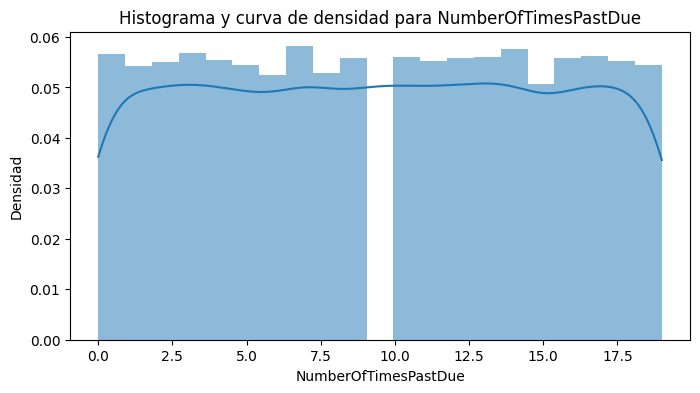

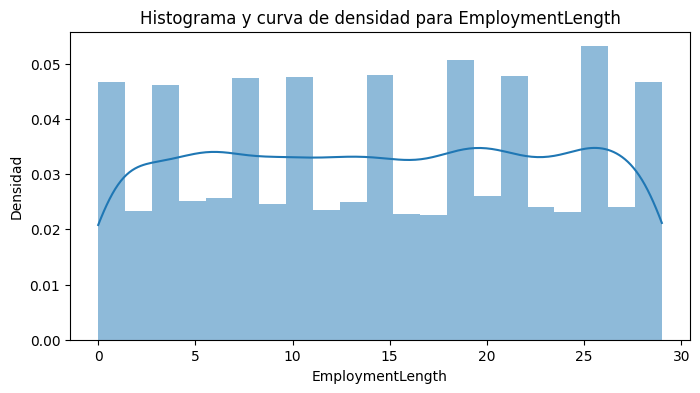

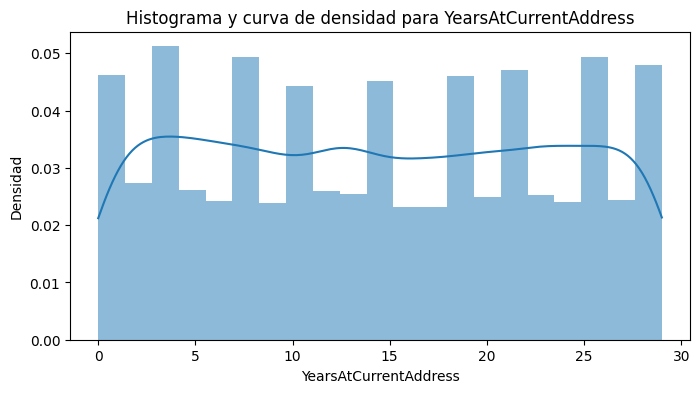

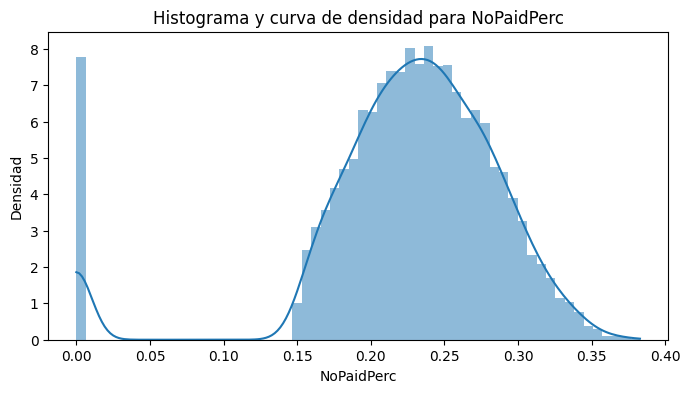

In [10]:
# Graficar el histograma con la curva de densidad para cada columna numérica de la base de datos
for col in df_historicos.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_historicos[col], kde=True, stat="density", linewidth=0)
    plt.title(f"Histograma y curva de densidad para {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()

<font color='056938'> **Correlacion entre variables independientes** </font>

**Variable Numericas**

In [11]:
# Seleccionar las variables numéricas
#Se utiliza la base de datos de calculo difencial imputada
numeric_vars = df_historicos.select_dtypes(include=['int', 'float']).columns

# Calcular correlación de Spearman
spearman_corr = df_historicos[numeric_vars].corr(method='spearman')['NoPaidPerc']

print("\nCorrelaciones de Spearman con la variable respuesta 'NoPaidPerc':")
print(spearman_corr)


Correlaciones de Spearman con la variable respuesta 'NoPaidPerc':
ID                                -0.142743
CreditScore                       -0.050739
DebtRatio                          0.317239
Assets                            -0.067351
Age                                0.220466
NumberOfDependents                -0.196391
NumberOfOpenCreditLinesAndLoans    0.146109
MonthlyIncome                     -0.044010
NumberOfTimesPastDue               0.083382
EmploymentLength                   0.221951
YearsAtCurrentAddress              0.165851
NoPaidPerc                         1.000000
Name: NoPaidPerc, dtype: float64


Se evidencia que no existe una correlación lineal de la variable objetivo (NoPaidPerc) con las demas variables númericas. Por tanto aplicar un modelo XGBoostRegressor es adecuado, ya que no afecta si las variables no son lineales. Las variables que se deciden no tener en cuenta es el ID, la edad

In [12]:
historicos= df_historicos.copy()
historicos.drop(columns=['ID', 'MaritalStatus', 'YearsAtCurrentAddress'], inplace=True)

<font color='056938'> **3. Estandarización de las variables** </font>


In [13]:
# Seleccionar columnas categóricas
X_categoricas = historicos.select_dtypes(include='object')

# Seleccionar columnas numéricas (enteras y flotantes)
X_numericas = historicos.select_dtypes(include=['int64', 'float64'])

# Convertir las variables categóricas a variables dummy
X_categoricas_dummies = pd.get_dummies(X_categoricas, drop_first=True)

# Combinar numéricas y dummies en un solo DataFrame
X_features= pd.concat([X_numericas, X_categoricas_dummies], axis=1)

# Mostrar las primeras filas
X_features.head()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,NoPaidPerc,HomeOwnership_Own,HomeOwnership_Rent,Education_High School,Education_Masters,Education_PhD
0,384,0.016560,37950,20,0,2,17355,9,28,0.196566,False,False,False,False,False
1,516,0.138825,22909,46,5,8,7175,13,0,0.264438,False,True,False,False,False
2,638,0.391149,126521,80,5,7,1910,6,25,0.287568,False,True,False,False,False
3,363,0.463521,39543,54,9,0,19339,5,22,0.181348,True,False,True,False,False
4,804,0.504824,38522,72,1,10,7928,18,19,0.343376,True,False,False,False,True


In [14]:
from sklearn.preprocessing import StandardScaler
# Escalar únicamente las columnas numéricas
scaler = StandardScaler()
X_features[X_numericas.drop(columns='NoPaidPerc', errors='ignore').columns] = scaler.fit_transform(
    X_features[X_numericas.drop(columns='NoPaidPerc', errors='ignore').columns]
)

# Verifica los resultados
X_features.head()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,NoPaidPerc,HomeOwnership_Own,HomeOwnership_Rent,Education_High School,Education_Masters,Education_PhD
0,-1.216297,-1.678443,-1.384470,-1.608507,-1.573613,-1.300925,1.267823,-0.084786,1.552206,0.196566,False,False,False,False,False
1,-0.387213,-1.253694,-1.674010,-0.349417,0.173487,-0.253608,-0.600388,0.608899,-1.690920,0.264438,False,True,False,False,False
2,0.379062,-0.377126,0.320526,1.297085,0.173487,-0.428161,-1.566609,-0.605049,1.204729,0.287568,False,True,False,False,False
3,-1.348197,-0.125706,-1.353805,0.037995,1.571167,-1.650030,1.631923,-0.778471,0.857251,0.181348,True,False,True,False,False
4,1.421699,0.017781,-1.373459,0.909673,-1.224193,0.095498,-0.462199,1.476006,0.509773,0.343376,True,False,False,False,True


In [15]:
# Separar características (X) y variable objetivo (y)
X = X_features.drop(columns=['NoPaidPerc'])
y = historicos['NoPaidPerc']

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo (regresión, porque NoPaidPerc es continua)
model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, objective='reg:squarederror')

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
preds = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Calcular el MAE
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

Mean Absolute Error (MAE): 0.0363
MSE: 0.0027
R2: 0.4083


# Hoptimización de hiperparametros
.

In [91]:
!pip install optuna

Razonamiento: Crear una instancia de un objeto de estudio Optuna para minimizar el MSE.



In [92]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    """Define la función objetivo para que Optuna optimice."""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'objective': 'reg:squarederror'
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return mse

In [93]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2025-06-14 18:42:53,874] A new study created in memory with name: no-name-533e35b2-4736-4fb5-8934-6bba06f2a2af
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [50, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [50, 950].
  warnings.warn(
[I 2025-06-14 18:43:03,759] Trial 0 finished with value: 0.002678273446911499 and parameters: {'n_estimators': 450, 'max_depth': 6, 'learning_rate': 0.020824182204597926}. Best is trial 0 with value: 0.002678273446911499.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [50, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [50, 950].
  warnings.warn(
[I 2025-06-14 18:43:15,365] Trial 1 finished with value: 0.0029932368096767734 and parameters: {'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.17806351396440254}. Best is trial 0 with valu

**Reasoning**:
The optimization process has finished. The next step is to report the best hyperparameters found by the study.



In [100]:
print("Mejores hiperparámetros encontrados por Optuna:")
print(study.best_params)
print("Mejor MSE:", study.best_value)

Mejores hiperparámetros encontrados por Optuna:
{'n_estimators': 350, 'max_depth': 4, 'learning_rate': 0.03204814677163934}
Mejor MSE: 0.002605224384650991


In [101]:
modelo_optimizado = XGBRegressor(**study.best_params)
modelo_optimizado.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03204814677163934,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=350, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluar modelo optimizado


In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Usar el modelo optimizado entrenado para hacer predicciones en las características de prueba X_test.
preds_optimizado = modelo_optimizado.predict(X_test)

# 2. Calcular el Error Absoluto Medio (MAE)
mae_optimized = mean_absolute_error(y_test, preds_optimizado)
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")

# 3. Calcular el Error Cuadrático Medio (MSE)
mse_optimized = mean_squared_error(y_test, preds_optimizado)
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")

# 4. Calcular el Coeficiente de Determinación (R2)
r2_optimized = r2_score(y_test, preds_optimizado)
print(f"R-squared (R2): {r2_optimized:.4f}")

Mean Absolute Error (MAE): 0.0361
Mean Squared Error (MSE): 0.0026
R-squared (R2): 0.4219


In [109]:
preds = modelo_optimizado.predict(X_test)

# Mejor modelo

El mejor modelo es el que  tiene optimización de Hiperparametros

In [110]:
import joblib
joblib.dump(modelo_optimizado, '/content/drive/MyDrive/Mod2/Finanzas/salidas/model.pkl')

['/content/drive/MyDrive/Mod2/Finanzas/salidas/model.pkl']

## Analisis predicciones



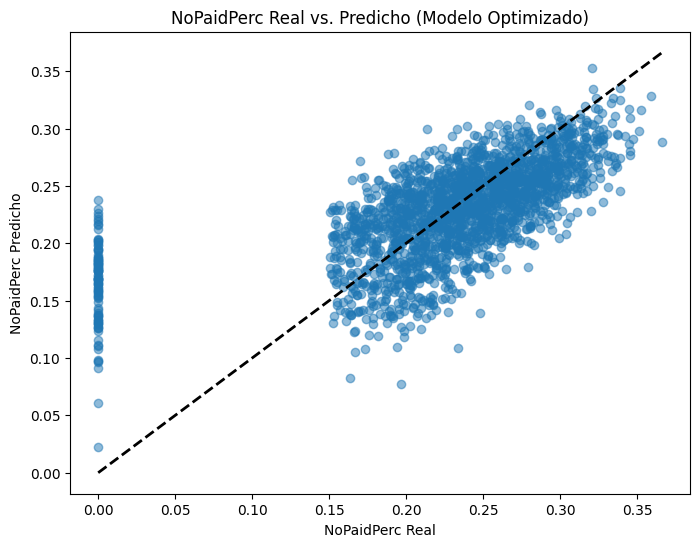

In [111]:
#Crear diagrama
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds_optimizado, alpha=0.5)

# 2. Añadir una línea diagonal al gráfico de dispersión que represente predicciones perfectas.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# 3. Etiquetar los ejes apropiadamente.
plt.xlabel("NoPaidPerc Real")
plt.ylabel("NoPaidPerc Predicho")

# 4. Añadir un título al gráfico de dispersión.
plt.title("NoPaidPerc Real vs. Predicho (Modelo Optimizado)")

# 5. Mostrar el gráfico.
plt.show()

In [112]:
# 7. Analizar las estadísticas descriptivas de optimized_preds y compararlas con las estadísticas descriptivas de y_test.
print("\nEstadísticas Descriptivas para NoPaidPerc Real (y_test):")
print(y_test.describe())

print("\nEstadísticas Descriptivas para NoPaidPerc Predicho (optimized_preds):")
print(pd.Series(preds_optimizado).describe())


Estadísticas Descriptivas para NoPaidPerc Real (y_test):
count    2000.000000
mean        0.228442
std         0.067146
min         0.000000
25%         0.201058
50%         0.235665
75%         0.270599
max         0.366159
Name: NoPaidPerc, dtype: float64

Estadísticas Descriptivas para NoPaidPerc Predicho (optimized_preds):
count    2000.000000
mean        0.228255
std         0.042468
min         0.022515
25%         0.202793
50%         0.232829
75%         0.257825
max         0.352628
dtype: float64


In [113]:
# Crear un DataFrame con las predicciones
df_preds = pd.DataFrame(preds_optimizado, columns=['NoPaidPerc_Predicho'])

In [114]:
df_preds["tasa_riesgo"] = df_preds["NoPaidPerc_Predicho"] / (1 - df_preds["NoPaidPerc_Predicho"])
limite_95=df_preds['tasa_riesgo'].quantile(0.95)
df_preds['tasa_riesgo'].clip(lower=0.02, upper=limite_95)
df_preds["tasa_total"] = 0.05 + 0.10 + df_preds["tasa_riesgo"]

df_preds[[ "NoPaidPerc_Predicho", "tasa_riesgo", "tasa_total"]].describe()

,NoPaidPerc_Predicho,tasa_riesgo,tasa_total
count,2000.000000,2000.000000,2000.000000
mean,0.228255,0.299614,0.449614
std,0.042468,0.070184,0.070184
min,0.022515,0.023033,0.173033
25%,0.202793,0.254380,0.404380
50%,0.232829,0.303491,0.453491
75%,0.257825,0.347391,0.497391
max,0.352628,0.544707,0.694707
